<a href="https://colab.research.google.com/github/Sebastian-Torres-Gamboa/SenalesSistemas/blob/main/SEBASTIAN_TORRES_PARCIAL_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PARCIAL 1

Sebastian Torres Gamboa

C.C 1122530252

15/05/2025

##EJERCICIO 1

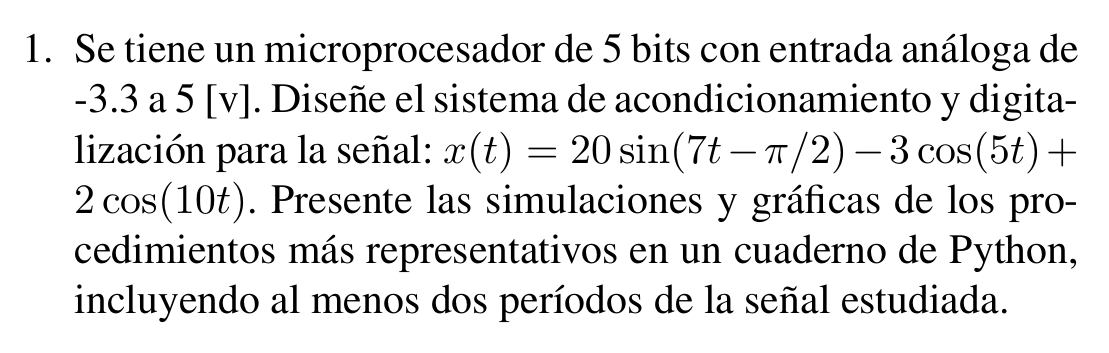

###DESARROLLO TEORICO

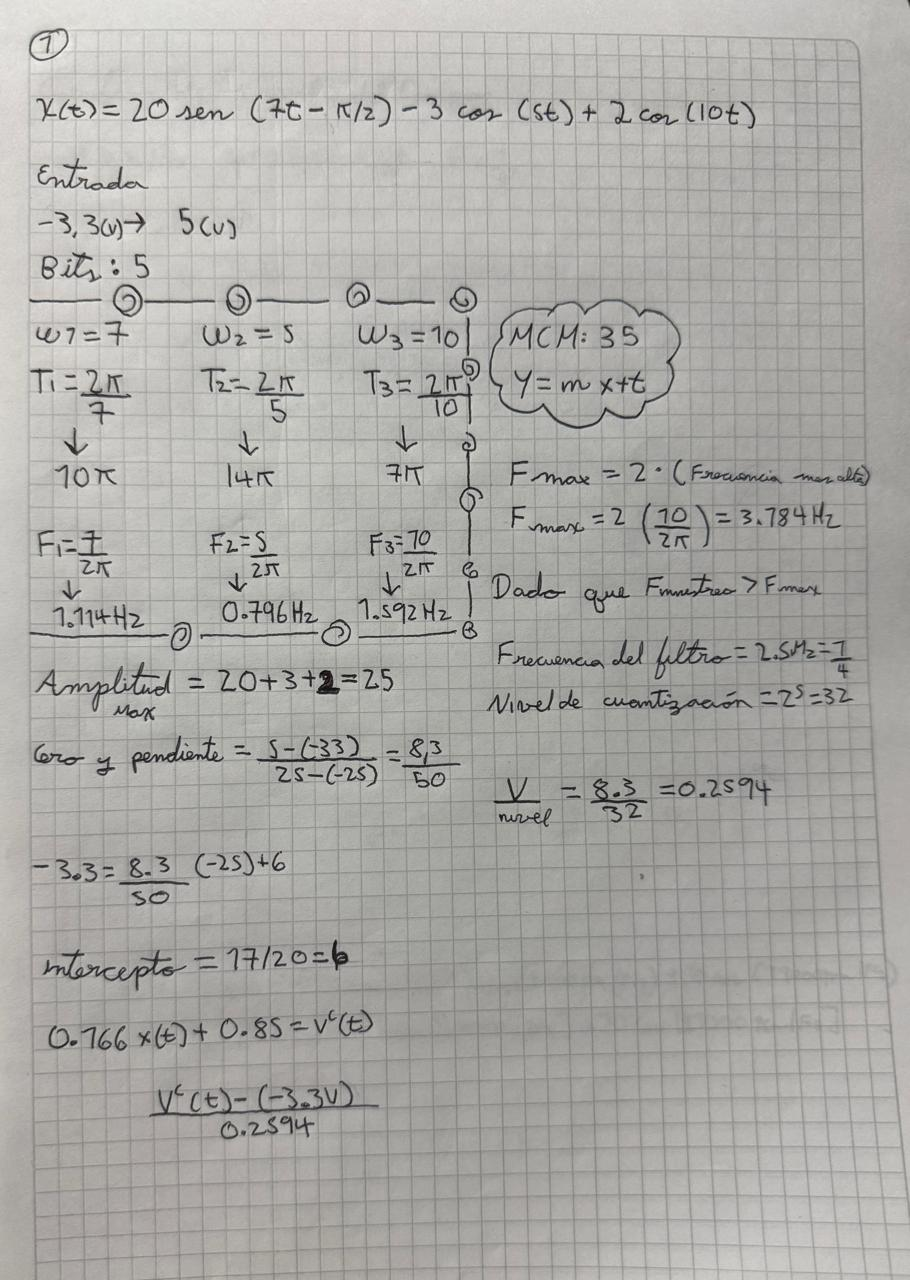

###CODIGO EN PYTHON

####IMPORTAR LIBRERIAS

In [104]:
import numpy as np                             # Biblioteca para trabajar con vectores, matrices y funciones matemáticas.
import matplotlib.pyplot as plt                # Módulo para graficar datos de forma visual y detallada.
from scipy.spatial.distance import cdist       # Función que calcula distancias entre puntos en espacios multidimensionales.

#### FUNCIÓN DE AJUSTE LINEAL (CERO Y PENDIENTE)

In [105]:
def ajustar_rango_lineal(signal_input, salida_min=-3.3, salida_max=5):
    '''
    Función que ajusta una señal de entrada a un nuevo rango definido por salida_min y salida_max.
    Toma un array de NumPy como entrada.
    '''
    valor_maximo_x = 25                      # Valor máximo estimado del dominio original de la señal.
    valor_minimo_x = -25                     # Valor mínimo estimado del dominio original.
    pendiente = (salida_max - salida_min) / (valor_maximo_x - valor_minimo_x)  # Cálculo de la pendiente de la recta.
    interseccion = salida_min - pendiente * valor_minimo_x                     # Intersección con el eje Y de la recta.
    salida_ajustada = pendiente * signal_input + interseccion                 # Aplicación de la transformación lineal.
    return salida_ajustada                                                     # Se devuelve la señal transformada.


####FUNCIÓN DE CUANTIZACIÓN

In [106]:
def cuantizar_valor(valor_entrada, niveles_discretos):
    '''
    Esta función toma un valor continuo y lo aproxima al valor más cercano dentro de un conjunto de niveles de cuantización.
    '''
    total_niveles = niveles_discretos.shape[0]                           # Cantidad total de niveles en el vector de cuantización.
    distancias = cdist(valor_entrada.reshape(-1, 1), niveles_discretos.reshape(-1, 1))  # Calcula distancias entre el valor y cada nivel.
    indice_mas_cercano = np.argmin(distancias)                          # Identifica el índice del nivel más próximo.
    return niveles_discretos[indice_mas_cercano]                        # Devuelve el nivel más cercano al valor de entrada.


####DEFINICIÓN DE PARÁMETROS DE SEÑALES Y TIEMPO

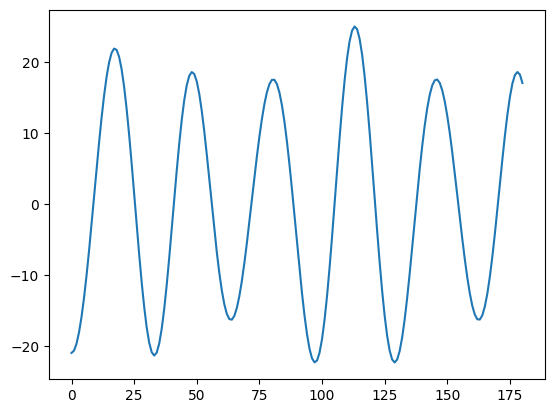

In [107]:
amplitud_1 = 20                     # Amplitud de la primera señal (componente senoidal).
amplitud_2 = -3                     # Amplitud de la segunda señal (componente cosenoidal).
amplitud_3 = 2                      # Amplitud de la tercera señal (componente cosenoidal).

periodo_1 = (2 / 7) * np.pi         # Periodo de la señal con frecuencia angular 7 rad/s.
periodo_2 = (2 / 5) * np.pi         # Periodo de la señal con frecuencia angular 5 rad/s.
periodo_3 = (2 / 10) * np.pi        # Periodo de la señal con frecuencia angular 10 rad/s.

frecuencia_angular_1 = 7           # Velocidad angular (rad/s) para la señal 1.
frecuencia_angular_2 = 5           # Velocidad angular para la señal 2.
frecuencia_angular_3 = 10          # Velocidad angular para la señal 3.

frecuencia_1 = 1 / periodo_1        # Frecuencia (Hz) de la señal 1.
frecuencia_2 = 1 / periodo_2        # Frecuencia de la señal 2.
frecuencia_3 = 1 / periodo_3        # Frecuencia de la señal 3.

tiempo_inicio = 0                   # Tiempo inicial de la simulación.
tiempo_final = 4 * periodo_2        # Tiempo final: 4 veces el periodo mayor para observar varias repeticiones.
frecuencia_muestreo = 36            # Frecuencia de muestreo (Hz) según teorema de Nyquist.
periodo_muestreo = 1 / frecuencia_muestreo  # Tiempo entre muestras.
vector_tiempo = np.arange(tiempo_inicio, tiempo_final, periodo_muestreo)  # Vector de tiempo discretizado.

# Composición de la señal como suma de funciones seno y coseno
senal_compuesta = (
    amplitud_1 * np.sin(frecuencia_angular_1 * vector_tiempo - np.pi / 2) +
    amplitud_2 * np.cos(frecuencia_angular_2 * vector_tiempo) +
    amplitud_3 * np.cos(frecuencia_angular_3 * vector_tiempo)
)

# ==============================
# PARÁMETROS PARA AJUSTE Y CUANTIZACIÓN
# ==============================

amplitud_minima = -3.3             # Límite inferior del rango de cuantización.
amplitud_maxima = 5                # Límite superior del rango de cuantización.
numero_bits = 5                    # Número de bits disponibles para codificar los niveles.

plt.plot(senal_compuesta, label='y(t)')  # Dibuja la señal original compuesta antes de aplicar cualquier transformación.

####AJUSTE DE SEÑAL Y CUANTIZACIÓN DIGITAL

In [108]:
# Se aplica la transformación lineal (cero y pendiente) a la señal original
senal_ajustada = ajustar_rango_lineal(senal_compuesta, amplitud_minima, amplitud_maxima)

# Se crean los niveles de cuantización equidistantes según los bits disponibles
niveles_cuantizacion = np.linspace(amplitud_minima, amplitud_maxima, 2 ** numero_bits)


####PROCESO DE CUANTIZACIÓN

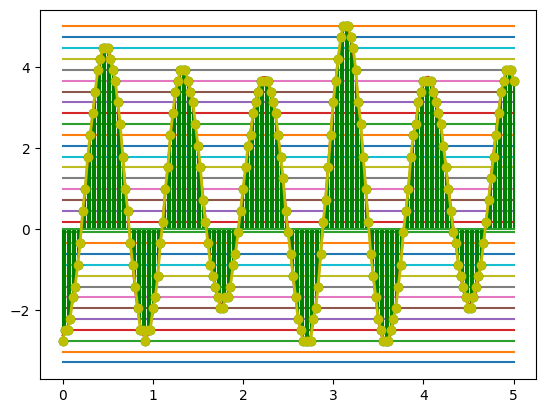

In [109]:

# Dibuja líneas horizontales representando los niveles de cuantización
for nivel in niveles_cuantizacion:
    plt.plot(vector_tiempo, nivel * np.ones(len(vector_tiempo)))  # Línea horizontal por cada nivel

# Dibuja los valores cuantizados como señales discretas
plt.stem(vector_tiempo, senal_cuantizada, linefmt="green", markerfmt="go", basefmt="", label="Señal Discretizada")

# Dibuja la señal luego del ajuste lineal (pero antes de cuantizar)
plt.plot(vector_tiempo, senal_ajustada, label='ycp(t)')  # Señal con cero y pendiente aplicada

# Dibuja la señal digital final (cuantizada)
plt.plot(vector_tiempo, senal_cuantizada, c='y', marker='o', label='ydig', linewidth=2)  # Señal digital final

##EJERCICIO 2

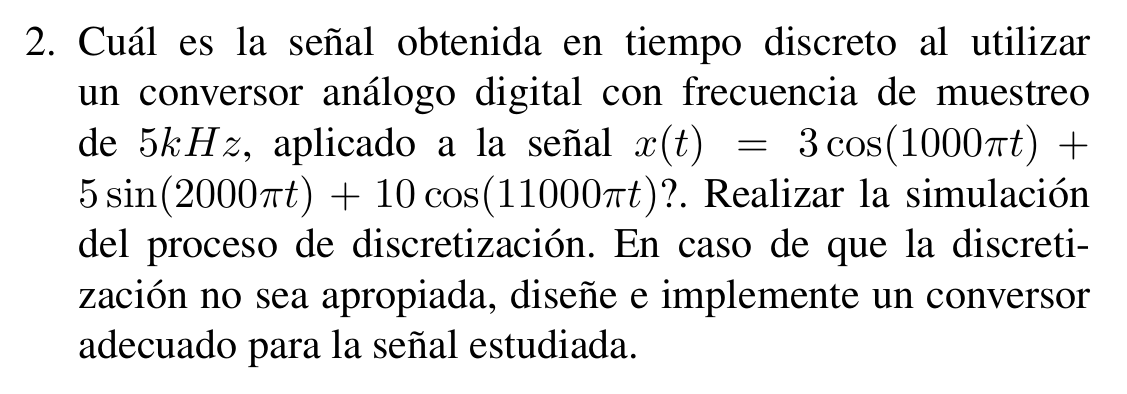

###DESARROLLO TEORICO

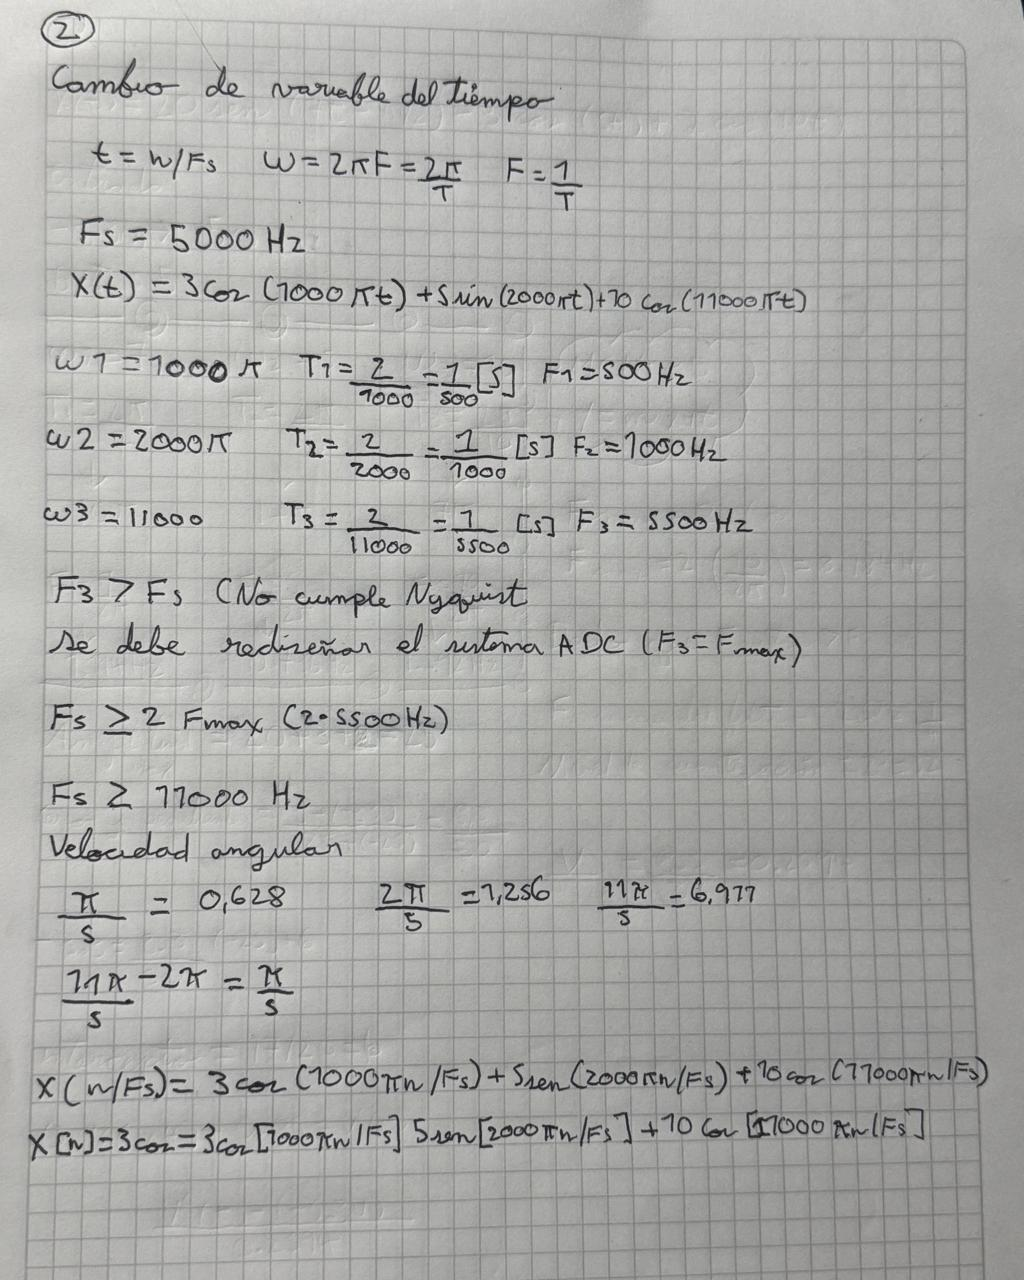

###CODIGO EN PYTHON

####DEFINICIÓN DE PARÁMETROS DE LA SEÑAL

In [110]:
f1 = 500    # Frecuencia de la componente 1 en Hz (500 Hz)
f2 = 1000   # Frecuencia de la componente 2 en Hz (1000 Hz)
f3 = 5500   # Frecuencia de la componente 3 en Hz (5500 Hz)
fs_high = 100000  # Frecuencia de muestreo alta para simular señal continua (100 kHz)
t_high = np.arange(0, 0.01, 1/fs_high)  # Tiempo desde 0 a 0.01 s con paso 1/fs_high (10 ms de duración)

####GENERACIÓN DE LA SEÑAL COMPUESTA CONTINUA

In [111]:
# Composición de una señal que tiene 3 frecuencias diferentes (500 Hz, 1000 Hz, 5500 Hz)
x_high = (3 * np.cos(2 * np.pi * f1 * t_high) +      # Componente senoidal a 500 Hz
          5 * np.sin(2 * np.pi * f2 * t_high) +      # Componente senoidal a 1000 Hz
          10 * np.cos(2 * np.pi * f3 * t_high))      # Componente senoidal a 5500 Hz

####FILTRO PASA BAJAS ANTIALIASING



In [112]:
nyquist = 0.5 * fs_high              # Frecuencia de Nyquist para el sistema simulado (50 kHz)
cutoff = 2500                        # Frecuencia de corte del filtro (elimino componentes > 2.5 kHz)
order = 6                            # Orden del filtro (mayor orden = respuesta más abrupta)
normal_cutoff = cutoff / nyquist    # Frecuencia normalizada para el diseño del filtro

# Diseño del filtro Butterworth de orden 6 con la frecuencia de corte especificada
b, a = signal.butter(order, normal_cutoff, btype='low')

####APLICACIÓN DEL FILTRO A LA SEÑAL

In [113]:

# Aplicamos el filtro Butterworth a la señal original con el método filtfilt, que preserva la fase
x_filtered = signal.filtfilt(b, a, x_high)  # Filtro con fase lineal (filtrado en ambas direcciones)

####MUESTREO DE LA SEÑAL FILTRADA

In [114]:

fs_low = 5000                     # Frecuencia de muestreo final (5 kHz) para la señal discretizada
factor = int(fs_high / fs_low)    # Factor de reducción entre las frecuencias de muestreo (20 en este caso)
x_filtered_low = x_filtered[::factor]  # Toma una muestra cada "factor" puntos (reducción de frecuencia de muestreo)
t_low = t_high[::factor]              # Vector de tiempo correspondiente a las muestras tomadas

####ANÁLISIS EN FRECUENCIA (FFT)

In [115]:

# Realizamos la Transformada Rápida de Fourier (FFT) para la señal original de alta frecuencia
fft_high = np.fft.rfft(x_high)                         # FFT de la señal original
freqs_high = np.fft.rfftfreq(len(x_high), 1/fs_high)   # Eje de frecuencias para la señal original (en Hz)

# Realizamos la FFT de la señal muestreada (después de filtrarla)
fft_filtered = np.fft.rfft(x_filtered_low)             # FFT de la señal filtrada y muestreada
freqs_low = np.fft.rfftfreq(len(x_filtered_low), 1/fs_low)  # Eje de frecuencias para la señal muestreada

####GRÁFICAS

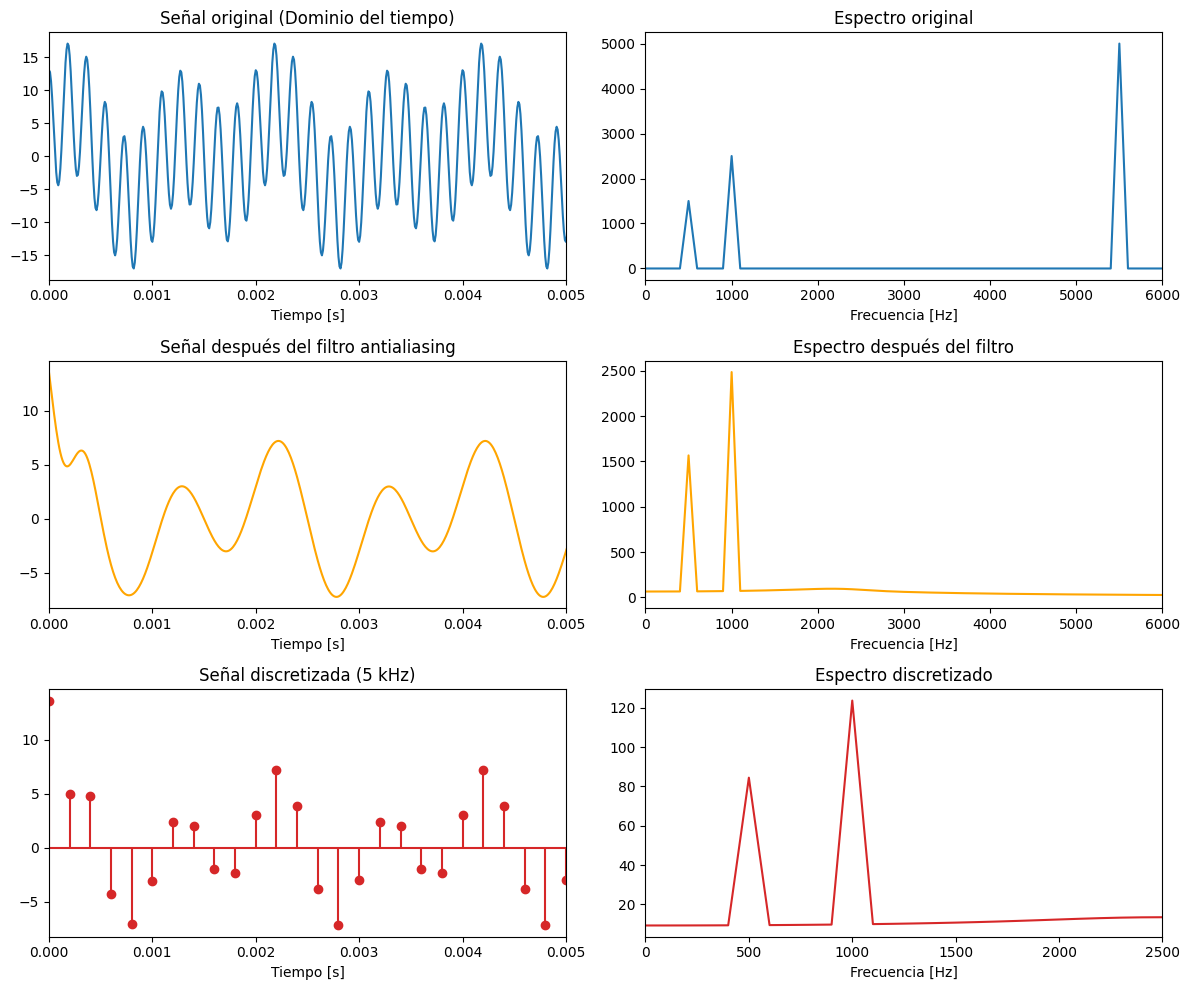

In [116]:

# Crear una figura grande para las subgráficas
plt.figure(figsize=(12, 10))

# 1. Gráfica de la señal original en el dominio del tiempo
plt.subplot(3, 2, 1)
plt.plot(t_high, x_high, label='Original')  # Dibuja la señal original
plt.title('Señal original (Dominio del tiempo)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)  # Limitar el eje x para ver solo los primeros 5 ms

# 2. Espectro de frecuencia (FFT) de la señal original
plt.subplot(3, 2, 2)
plt.plot(freqs_high, np.abs(fft_high))  # Muestra el espectro de la señal original
plt.title('Espectro original')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)

# 3. Gráfica de la señal filtrada en el dominio del tiempo
plt.subplot(3, 2, 3)
plt.plot(t_high, x_filtered, 'orange', label='Filtrada')  # Señal filtrada
plt.title('Señal después del filtro antialiasing')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# 4. Espectro de frecuencia (FFT) de la señal filtrada
plt.subplot(3, 2, 4)
plt.plot(freqs_high, np.abs(np.fft.rfft(x_filtered)), color='orange')  # Espectro de la señal filtrada
plt.title('Espectro después del filtro')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)

# 5. Gráfica de la señal discretizada (muestreada) en el dominio del tiempo
plt.subplot(3, 2, 5)
plt.stem(t_low, x_filtered_low, linefmt='C3-', markerfmt='C3o', basefmt='C3-')  # Señal muestreada
plt.title('Señal discretizada (5 kHz)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# 6. Espectro de frecuencia (FFT) de la señal discretizada
plt.subplot(3, 2, 6)
plt.plot(freqs_low, np.abs(fft_filtered), color='C3')  # Espectro de la señal discretizada
plt.title('Espectro discretizado')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 2500)

# Ajuste final del diseño de la figura
plt.tight_layout()
plt.show()

##EJERCICIO 3

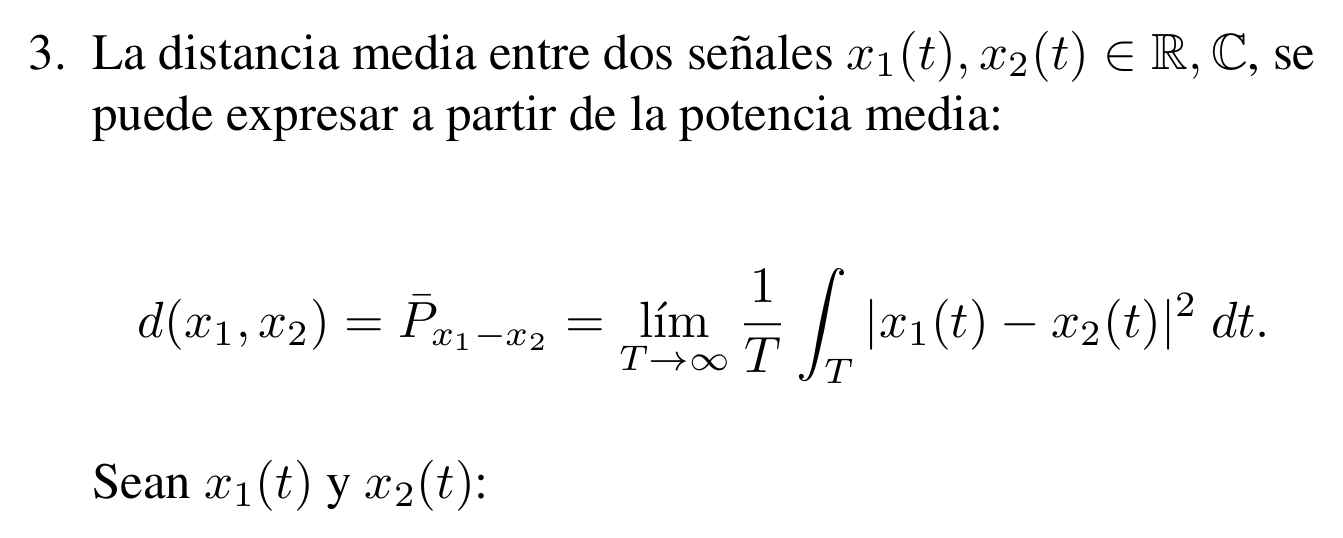

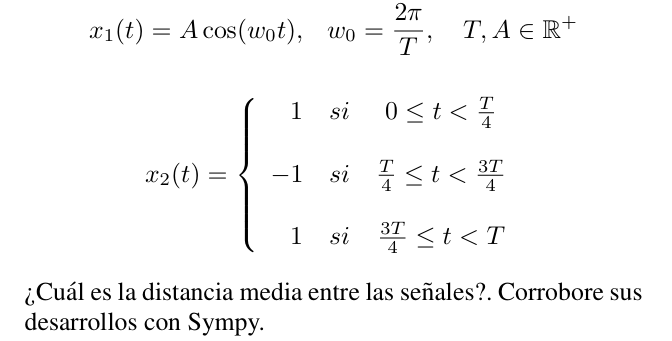

###DESARROLLO TEORICO

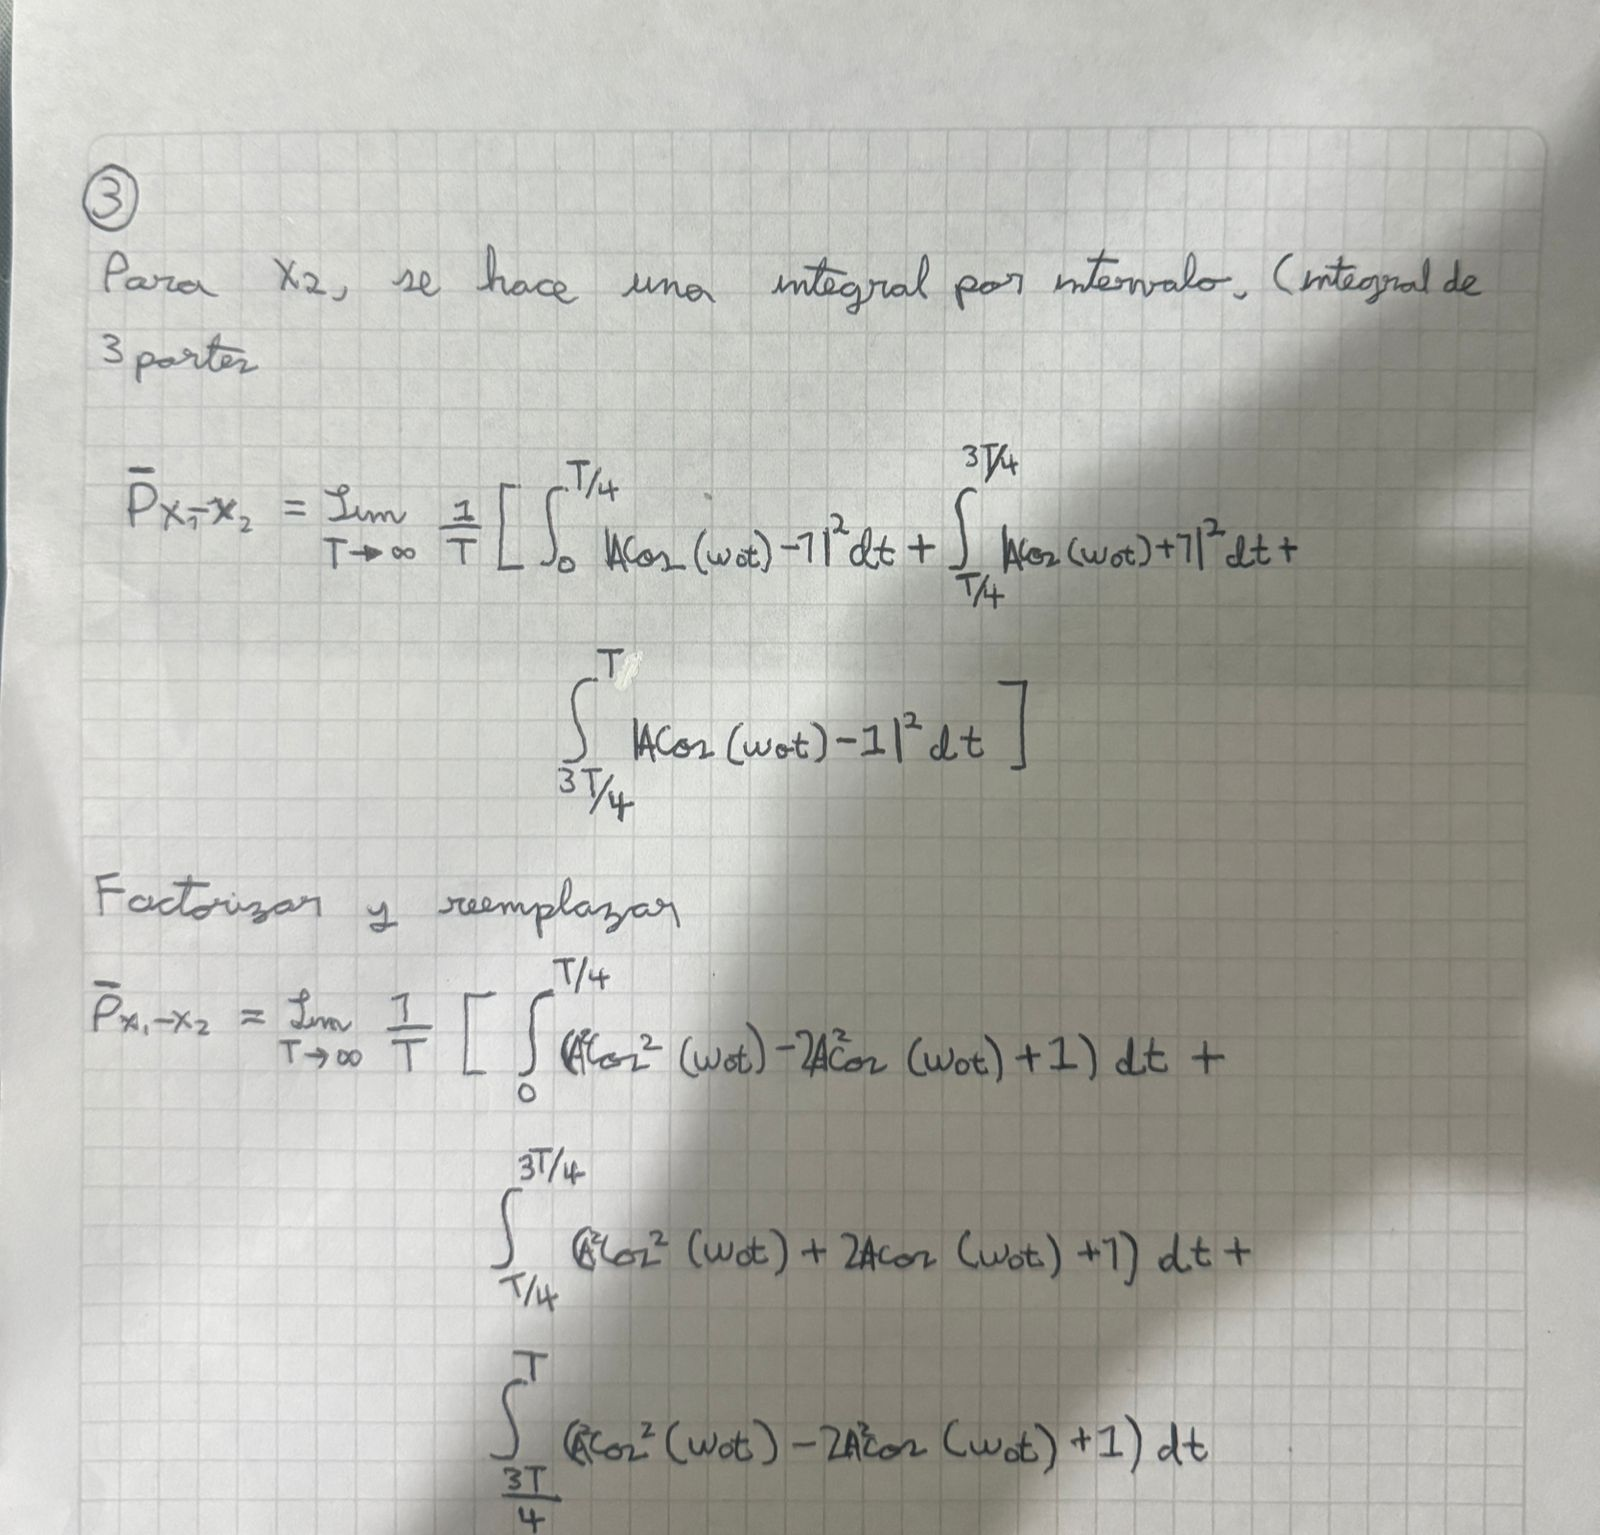

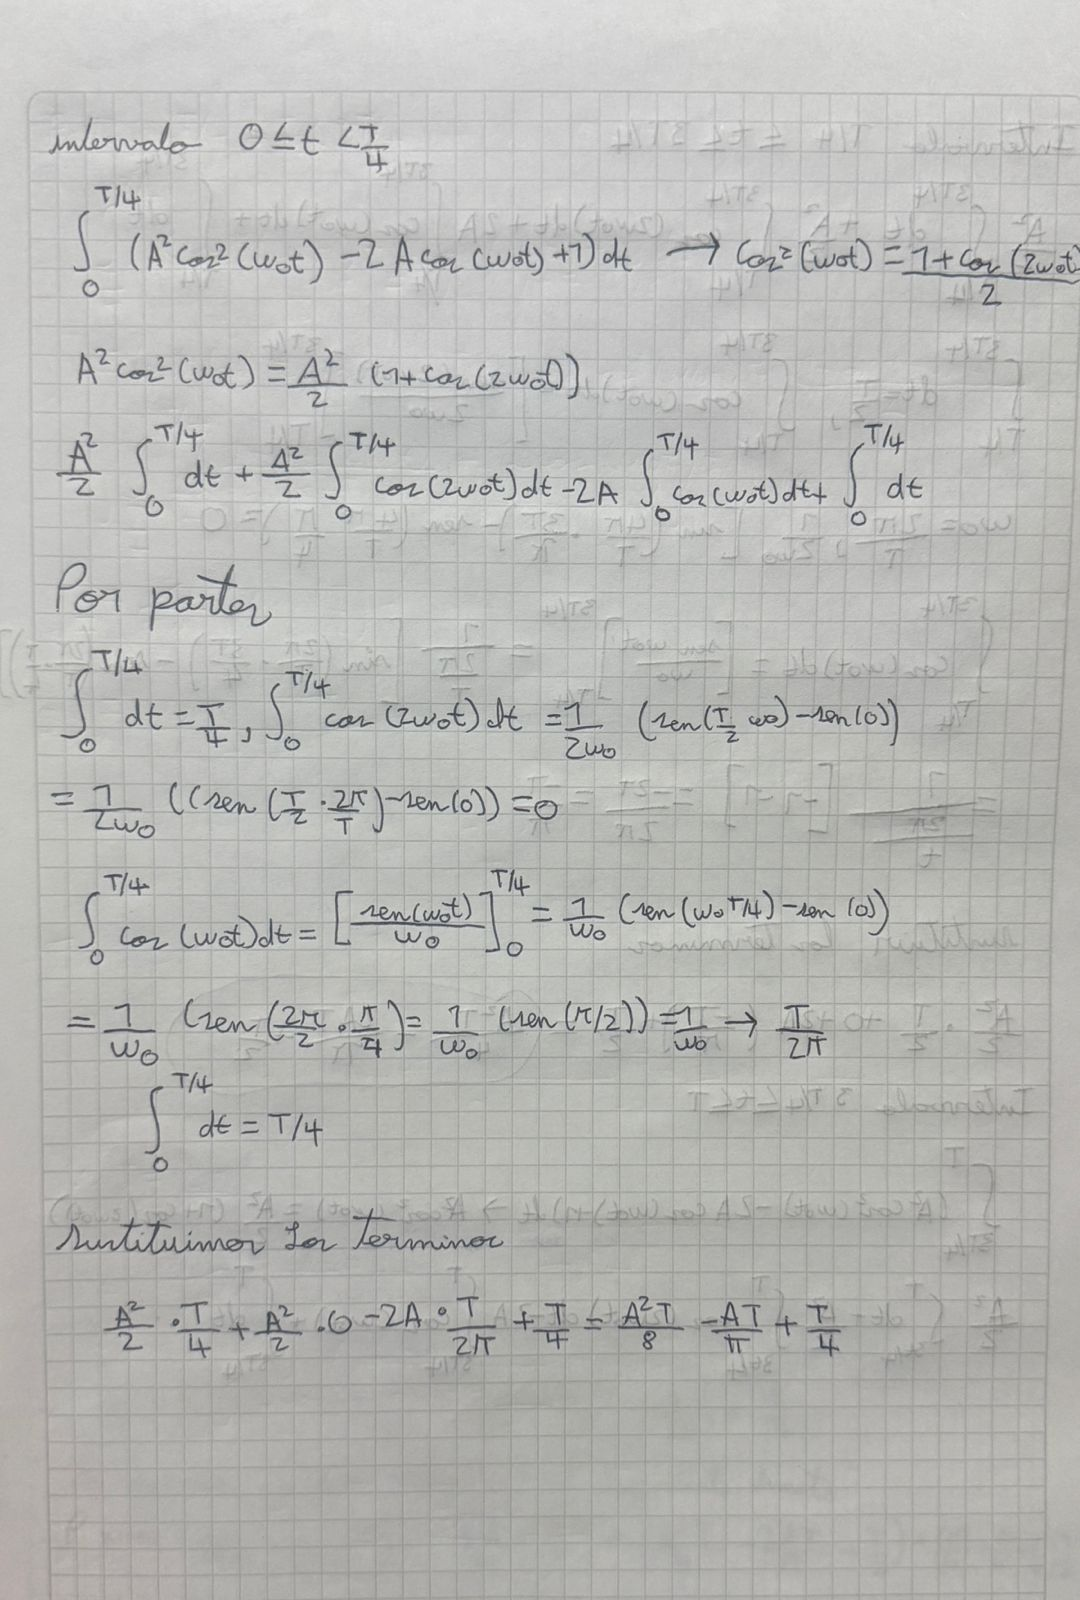

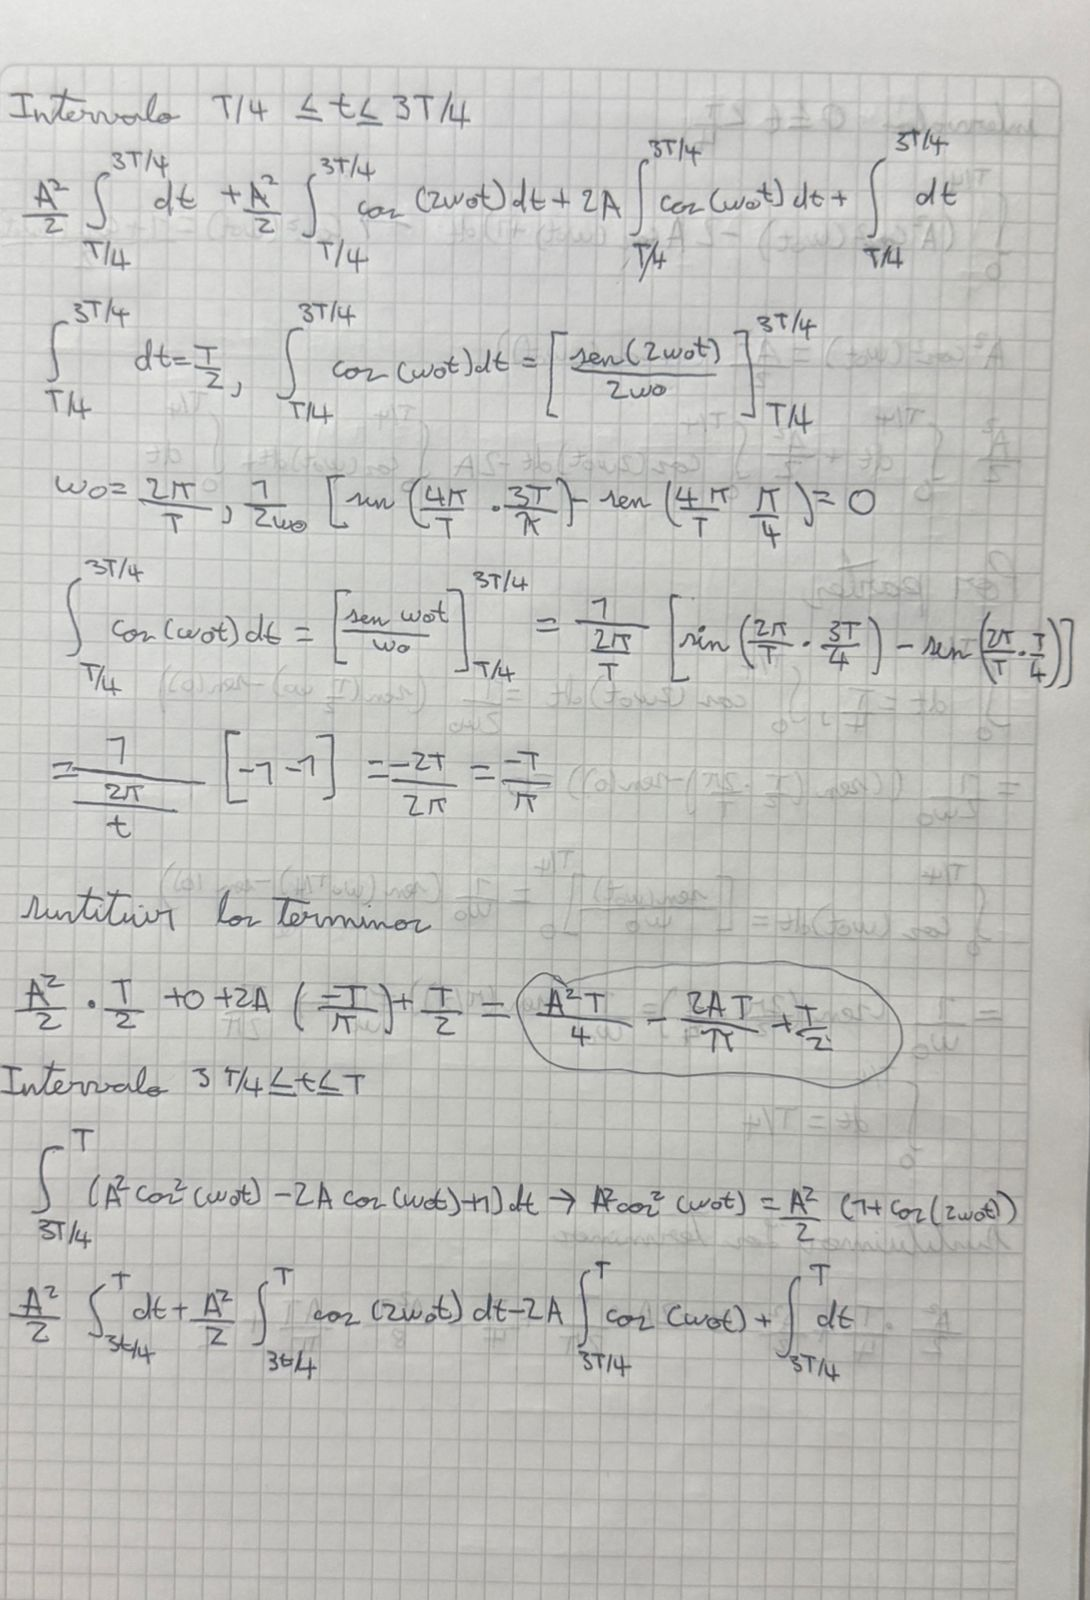


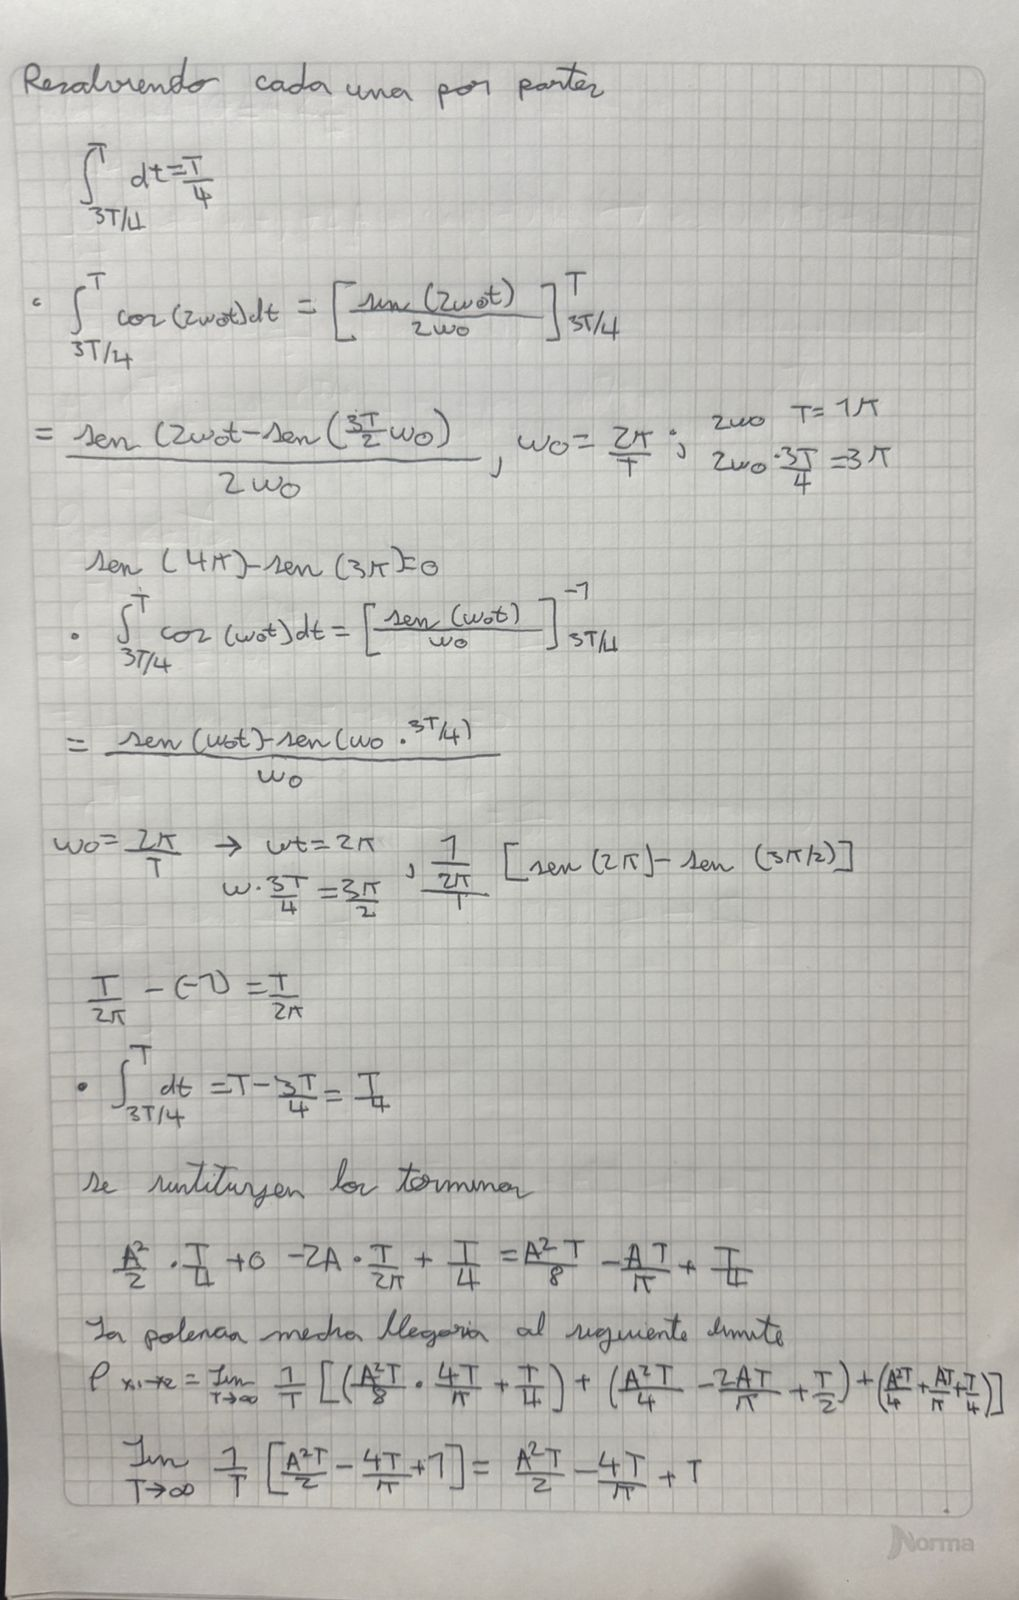



###CODIGO EN PYTHON

####DEFINICIÓN DE VARIABLES SÍMBOLICAS

In [117]:
import sympy as sp  # Importamos SymPy para trabajar con álgebra simbólica

A, t, T = sp.symbols('A t T', real=True, positive=True)  # A: Amplitud, t: tiempo, T: periodo
w0 = 2 * sp.pi / T  # Frecuencia angular fundamental (omega_0 = 2π / T)

####DEFINICIÓN DE LAS SEÑALES PERIÓDICAS

In [118]:
# Señal x1: señal cosenoidal de frecuencia fundamental w0
x1 = A*sp.cos(w0 * t)

# Señal x2: señal por tramos tipo onda cuadrada, definida en un periodo [0, T)
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),             # Primer cuarto del periodo: valor 1
    (-1, (t >= T/4) & (t < 3*T/4)),        # Mitad central del periodo: valor -1
    (1, (t >= 3*T/4) & (t < T))            # Último cuarto del periodo: valor 1
)

####DIFERENCIA CUADRÁTICA ENTRE LAS SEÑALES

In [119]:
# Definimos la función a integrar: el error cuadrático (x1 - x2)^2
f = (x1 - x2)**2

####CÁLCULO DE LA INTEGRAL POR TRAMOS

In [120]:
# Se integran los tres tramos de la función definida por partes
integral = (
    sp.integrate(f, (t, 0, T/4)) +           # Primer tramo
    sp.integrate(f, (t, T/4, 3*T/4)) +       # Segundo tramo
    sp.integrate(f, (t, 3*T/4, T))           # Tercer tramo
)

####CÁLCULO DE LA DISTANCIA MEDIA CUADRÁTICA

In [121]:
# Promedio sobre el periodo
distancia_media = integral / T

####SIMPLIFICACIÓN DEL RESULTADO FINAL

In [122]:

distancia_media_simplificada = sp.simplify(distancia_media)

####MOSTRAR RESULTADO FINAL



In [123]:
print("Distancia media cuadrática entre x1(t) y x2(t):")
display(distancia_media_simplificada)

Distancia media cuadrática entre x1(t) y x2(t):


A**2/2 - 4*A/pi + 1

##EJERCICIO 4

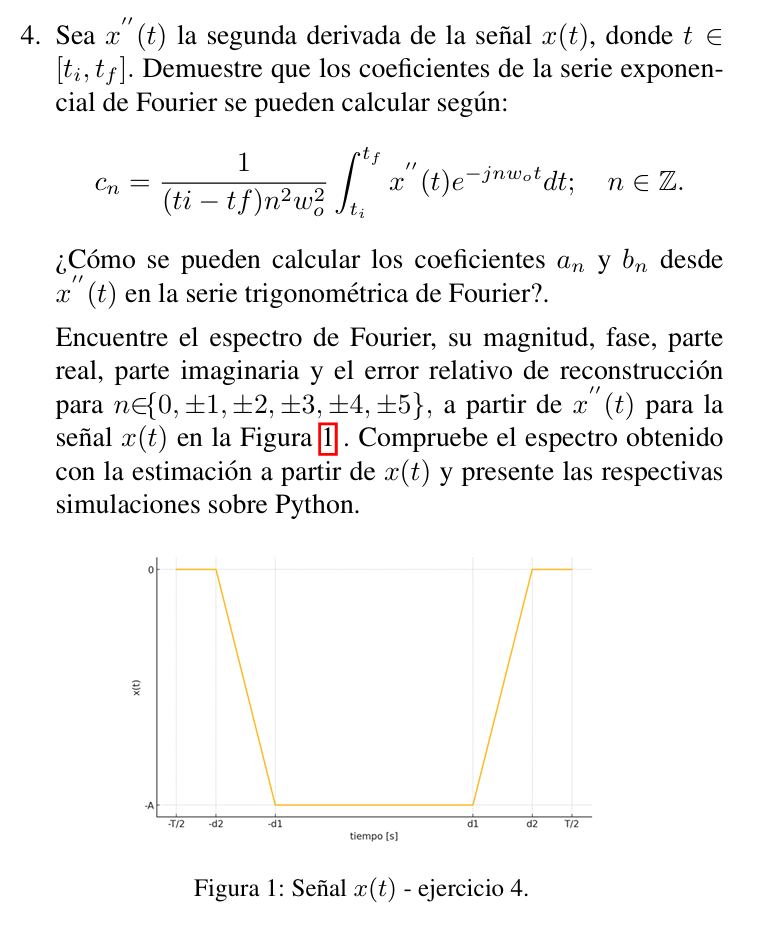

###DESARROLLO MATEMATICO

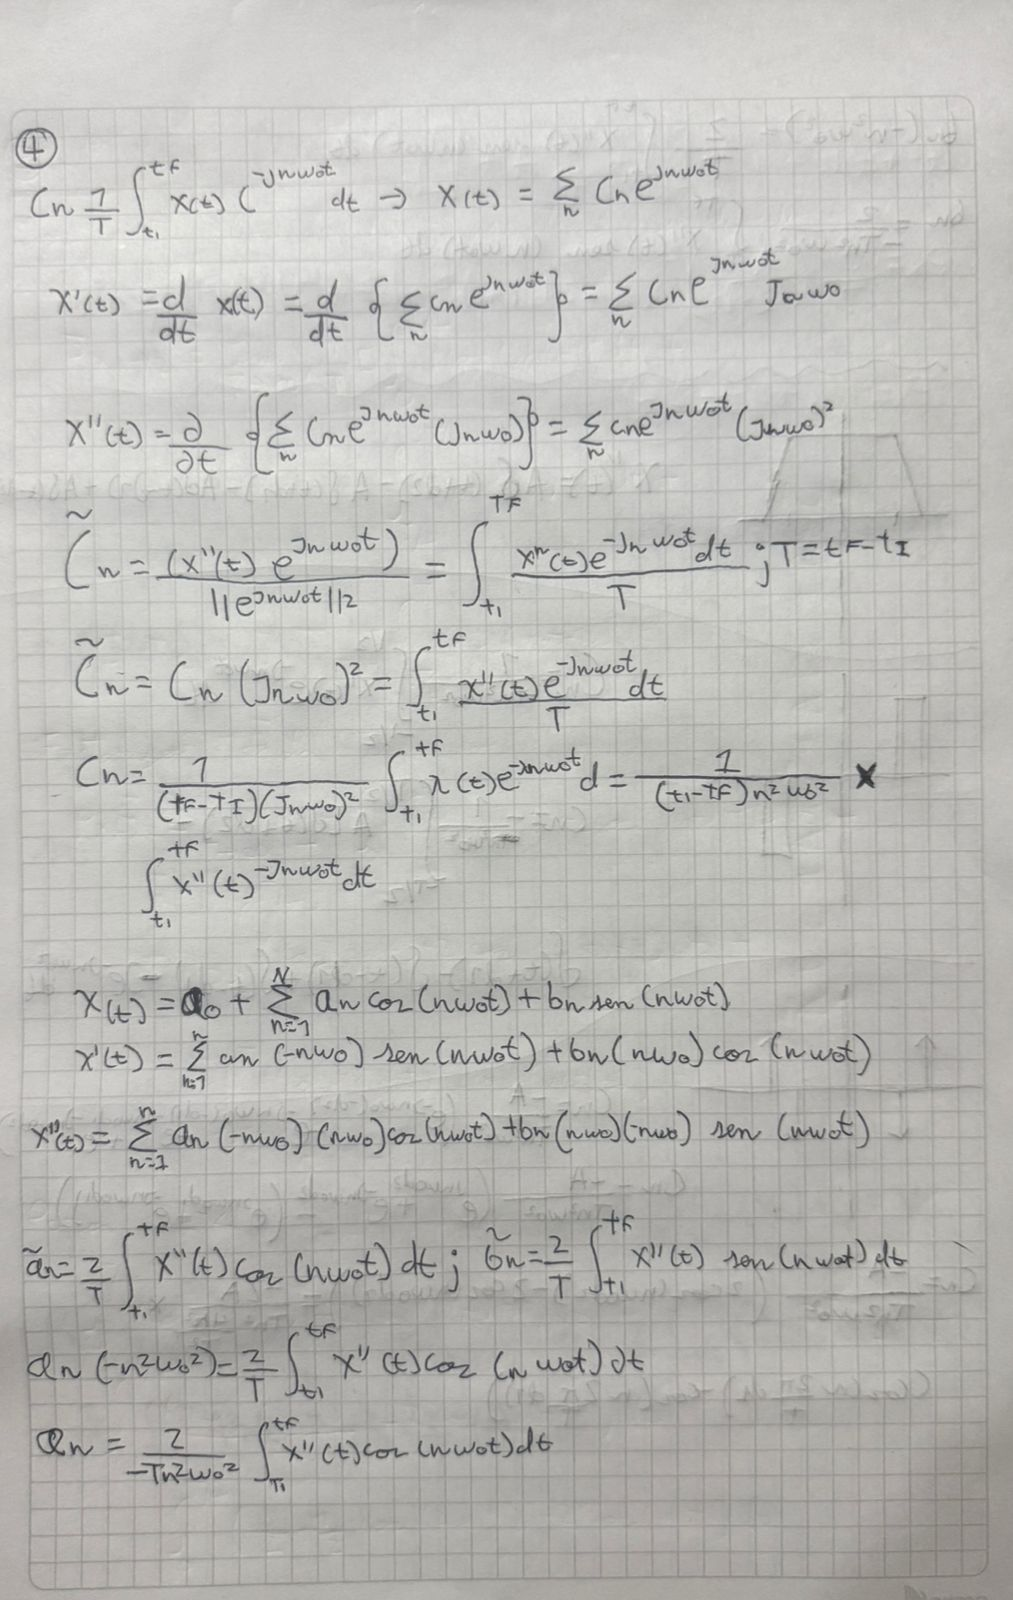

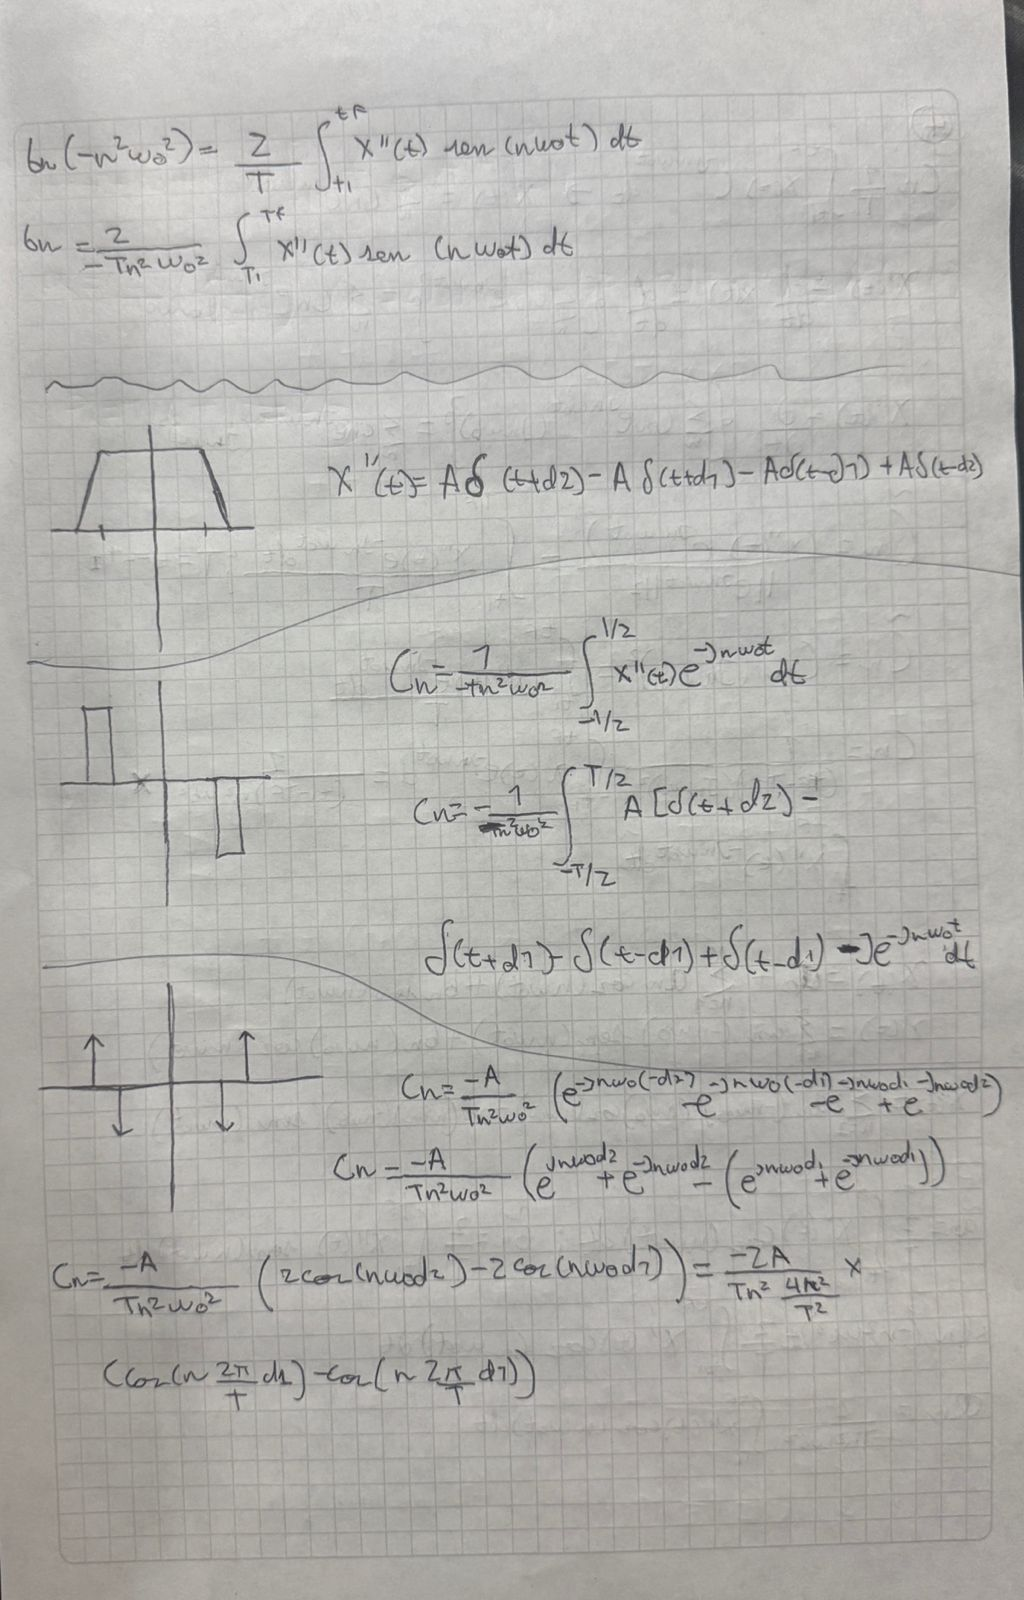

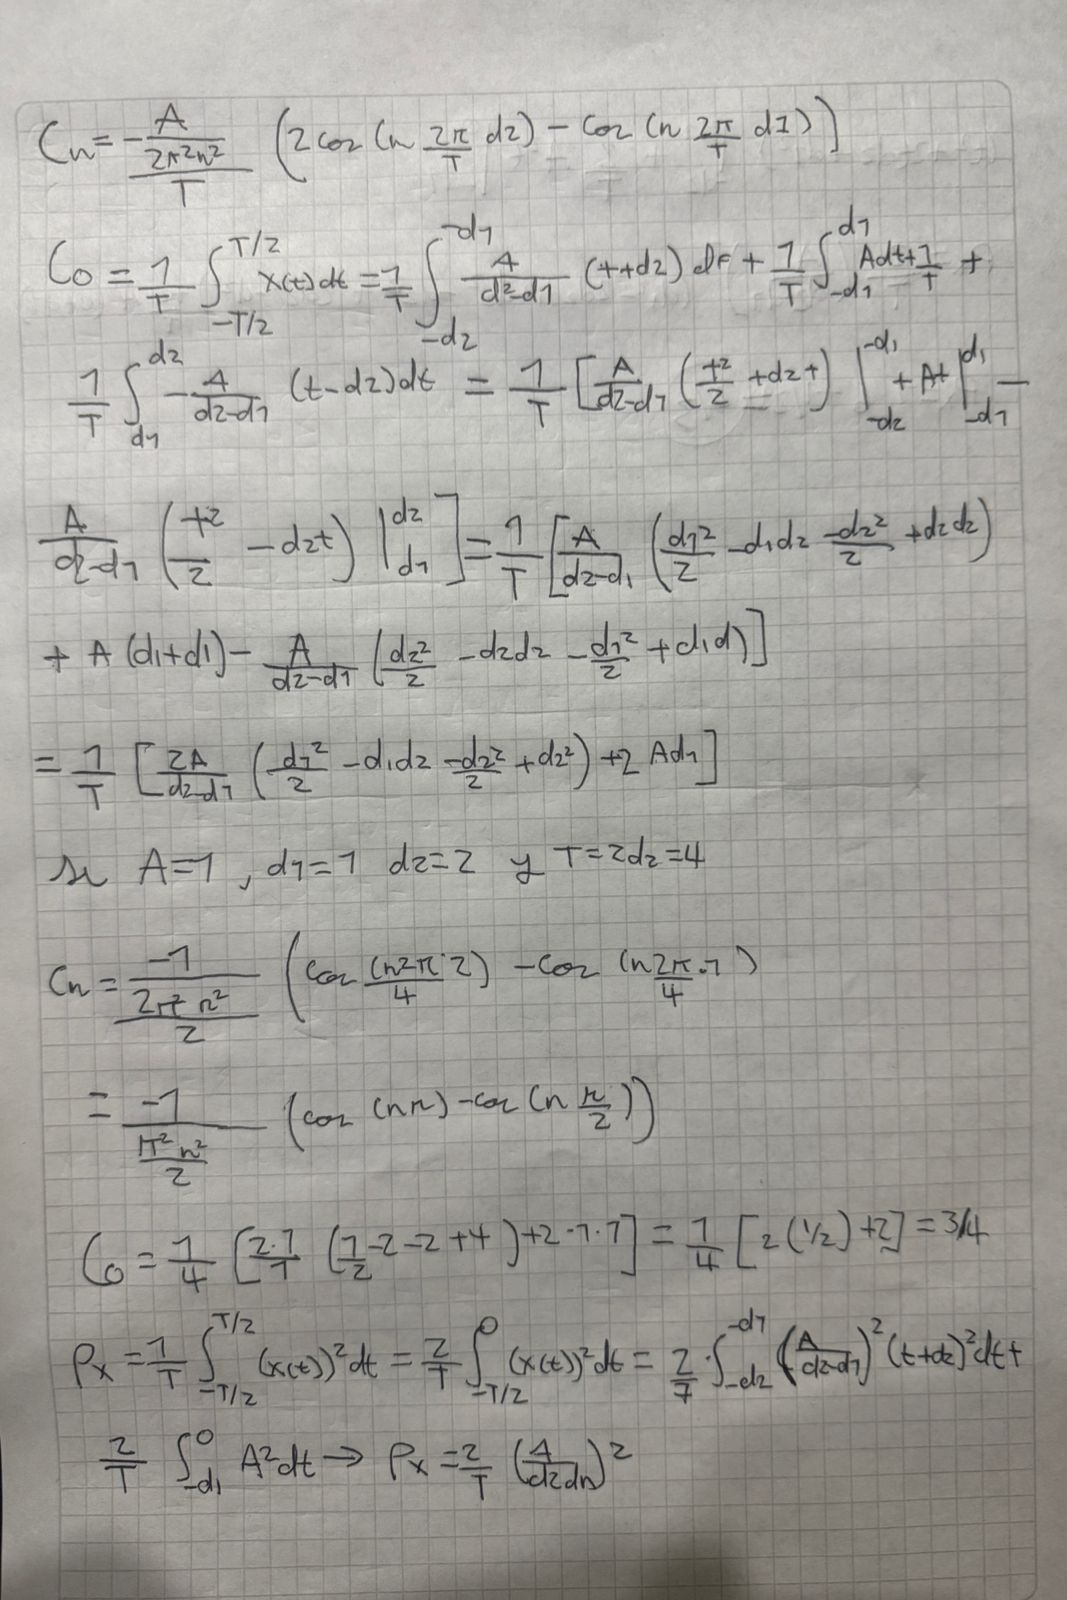

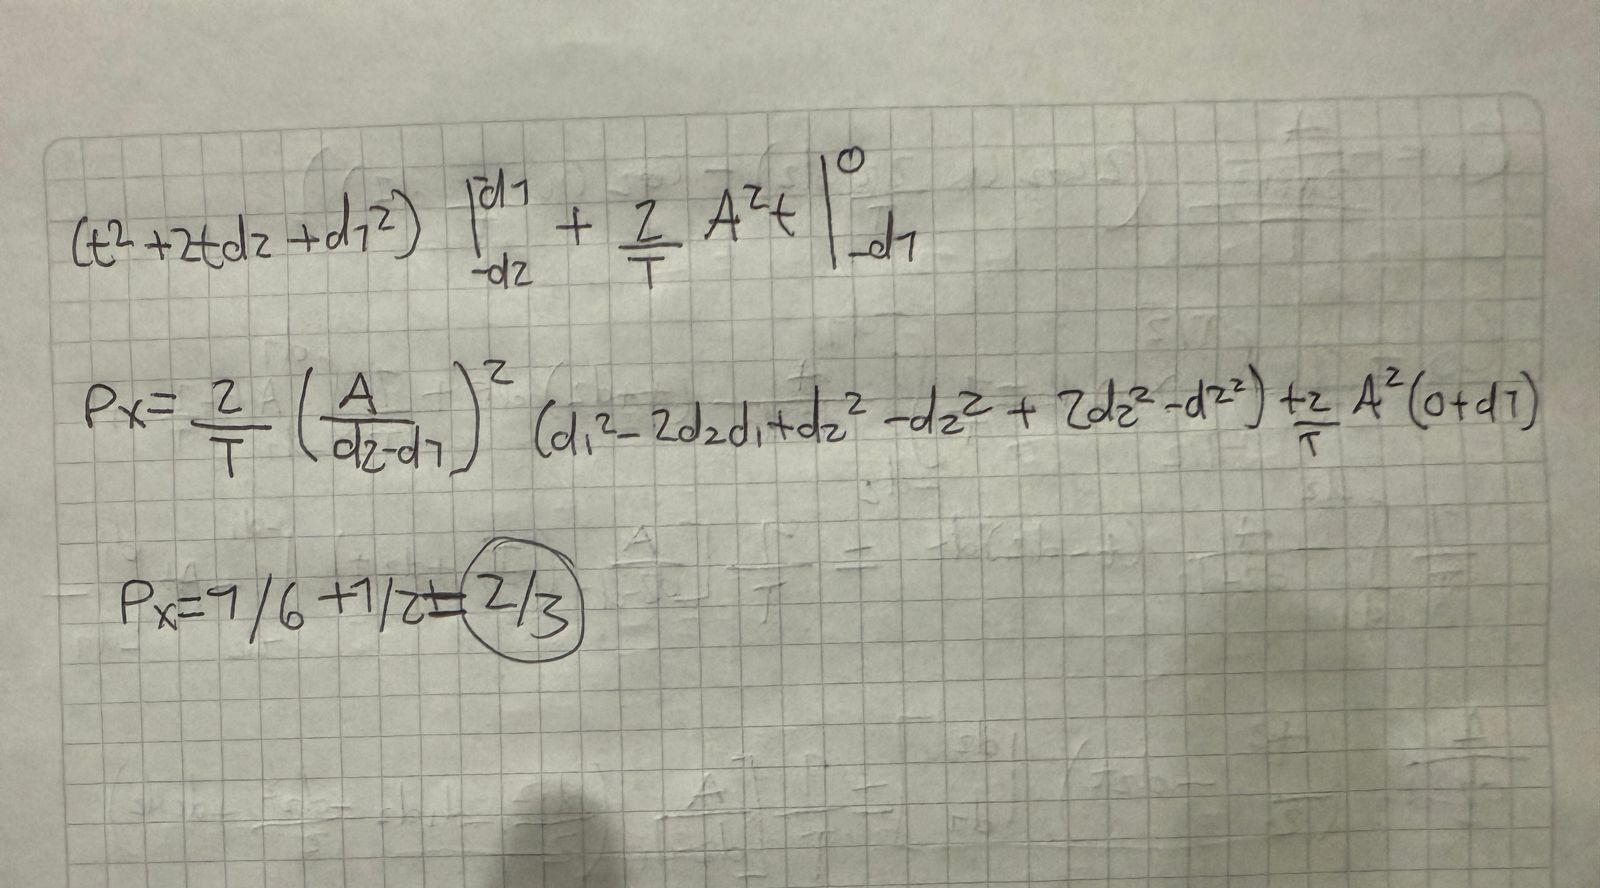

###CODIGO EN EN PYTHON

####IMPORTACIÓN Y PARÁMETROS DE LA SEÑAL

In [124]:
from ipywidgets import interact, IntSlider  # Se importa 'interact' para crear interfaces interactivas

A = 1     # Amplitud máxima
d2 = 2    # Límite derecho del trapecio
d1 = 1    # Límite izquierdo del segmento plano

# Parámetros temporales
T = 2 * d2              # Periodo de la señal
Fo = 1 / T              # Frecuencia fundamental
Fs = 1000 * Fo          # Frecuencia de muestreo (alta resolución)
tv = np.arange(-T/2, T/2, 1/Fs)  # Vector de tiempo
Nm = len(tv)            # Cantidad de muestras



####DEFINICIÓN DE LA FUNCIÓN TRAPEZOIDAL Y GRÁFICA

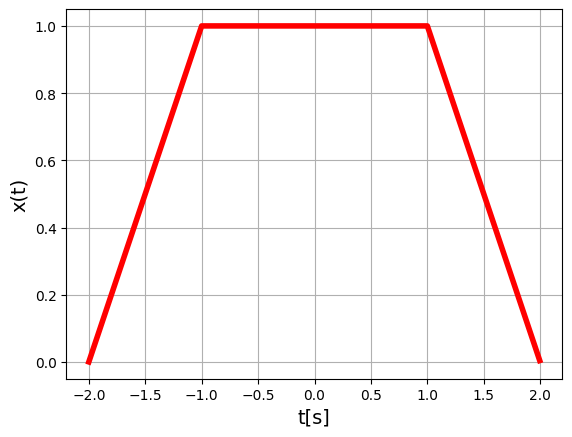

In [125]:
def funcion_trapecio(x, a, b, c, d):
    """
    Genera una función en forma de trapecio.
    """
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

###Generación y visualización de la señal trapezoidal
x = funcion_trapecio(tv, -d2, -d1, d1, d2)

plt.plot(tv, x, 'r', linewidth=4)
plt.grid()
plt.xlabel("t[s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.show()

####CÁLCULO DE COEFICIENTES DE FOURIER

In [126]:
N = 5                     # Número de armónicos considerados
wo = 2 * np.pi / T        # Frecuencia fundamental

phin = np.zeros((Nm, 2 * N + 1), np.complex128)  # Matriz de funciones base
cn = np.zeros(2 * N + 1, np.complex128)          # Vector de coeficientes
nv = np.linspace(-N, N, 2 * N + 1)               # Índices n = [-N, ..., N]
#Cálculo de las exponenciales complejas e^(jnw0*t)
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)
#Cálculo de los coeficientes Cn (expresión analítica)
Cn = (-2 * (np.cos(nv * np.pi) - np.cos(nv * np.pi * 0.5))) / (np.pi**2 * nv**2)
Cn[N] = 3 / 4  # Corrección para n=0

<ipython-input-126-5b07d347d716>:11: RuntimeWarning: invalid value encountered in divide
  Cn = (-2 * (np.cos(nv * np.pi) - np.cos(nv * np.pi * 0.5))) / (np.pi**2 * nv**2)


####VISUALIZACIÓN DEL ESPECTRO DE FOURIER

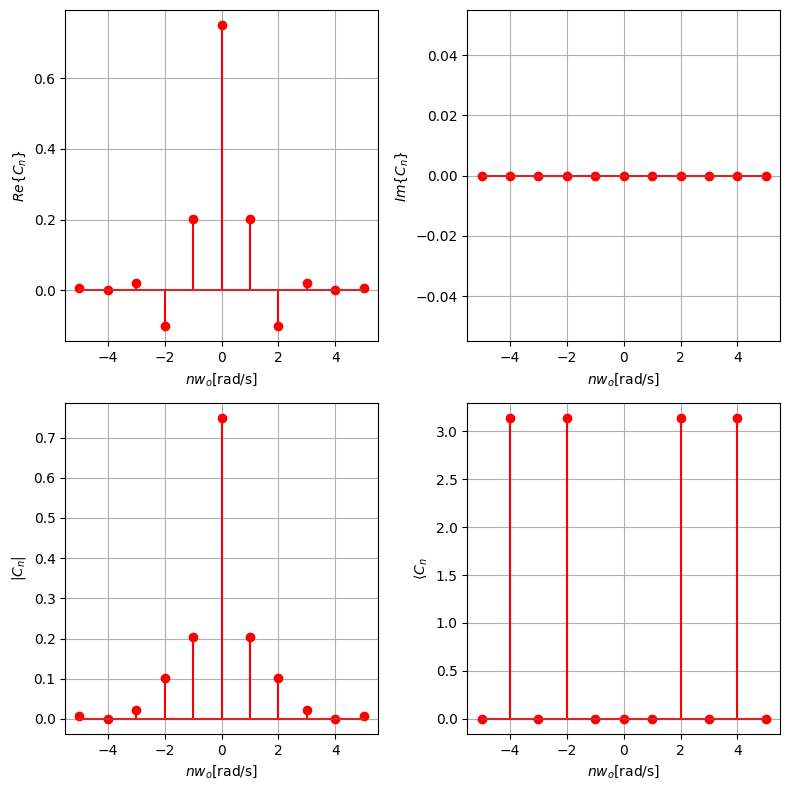

In [127]:
fig = plt.figure(figsize=(8, 8))

# Parte real
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]')
plt.ylabel(r'$Re\{C_n\}$')
plt.axis('tight')
plt.grid()

# Parte imaginaria
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]')
plt.ylabel(r'$Im\{C_n\}$')
plt.axis('tight')
plt.grid()

# Magnitud
plt.subplot(2, 2, 3)
plt.stem(nv, abs(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]')
plt.ylabel(r'$|C_n|$')
plt.axis('tight')
plt.grid()

# Fase
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]')
plt.ylabel(r'$\langle C_n$')
plt.axis('tight')
plt.grid()

fig.tight_layout()

####RECONSTRUCCIÓN DE LA SEÑAL Y ERROR ENERGÉTICO

In [128]:
Px = 2/3  # Potencia estimada de la señal original

def pltest(Na=1):
    ind = np.arange(N - Na, N + Na + 1)
    er = 1 - np.sum(abs(Cn[ind])**2) / Px
    xe = phin[:, ind].dot(Cn[ind])

    plt.plot(tv, xe, color='b', label='$x_e(t)$')
    plt.plot(tv, x, color='r', label='x(t)')
    plt.title('$E_r$=%.2f[%%]' % (100 * er), fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
#Interfaz interactiva con control deslizante
interact(pltest, Na=(1, N, 1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>